# Example 10: Composition scaling

In this notebook, we will calculate the free energy of a binary ZrCu system as a function of the composition. The structure that will be considered is ZrCu with a B2 structure. The potential that will be used is-

[M.I. Mendelev , M.J. Kramer , R.T. Ott , D.J. Sordelet , D. Yagodin & P. Popel (2009) Development of suitable interatomic potentials for simulation of liquid and amorphous Cu–Zr alloys, Philosophical Magazine, 89:11, 967-987](http://dx.doi.org/10.1080/14786430902832773)

In the first part of the example, a simple free energy difference that happens when a substitutional atom is introduced is calculated in two ways. In the second part, we directly calculate the free energy as the composition varies in the given system.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from calphy.input import read_report
from uncertainties import ufloat

The `composition_scaling` block in the input file looks slightly different here:

```
composition_scaling:
  output_chemical_composition:
    Cu: 122
    Zr: 128
```

Once again, the `input_chemical_composition` shows equal number of Cu and Zr atoms, as expected in the B2 structure. The `output_chemical_composition` has 122 Cu and 128 Zr atoms, which amounts to 52 at. % Zr. The composition integration therefore will span 48-52% of Zr.

As usual, the calculation can be run by:

```
calphy -i input3.yaml
```

In [11]:
flambda_arr, netfe, warr, mcorrarr = np.loadtxt("sub-composition_scaling-zrcu_48.data-solid-800-0/composition_sweep.dat", unpack=True,
                               usecols=(0,1,2,3))

The first column, `flambda_arr` goes from 1.00 to 0.00. This spans the composition interval. At 1.00, the composition is 48 % Zr, while at 0.00, the composition is 52 %. First, the array is converted to the actual composition.

In [5]:
comp = 0.52-flambda_arr*(0.52-0.48)

We will also use direct calculations done using calphy (using input files `input1.yaml` and `input2.yaml`). The results from direct calculations are given here for easiness.

In [7]:
comp_direct = np.array([0.48, 0.52])
fe_direct = np.array([-5.308, -5.381])

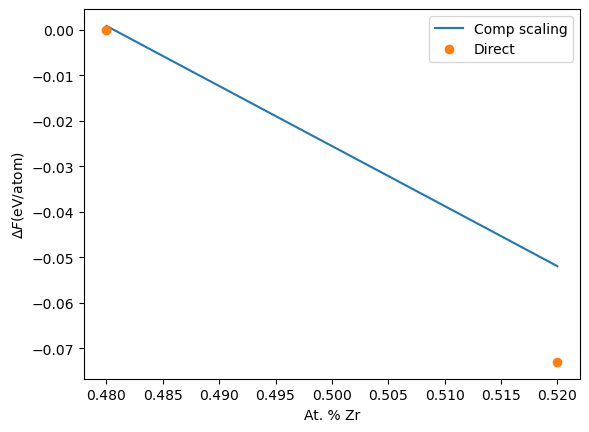

In [14]:
plt.plot(comp, warr-mcorrarr, label="Comp scaling")
plt.plot(comp_direct, fe_direct-fe_direct[0], "o", label="Direct")
plt.legend()
plt.xlabel("At. % Zr")
plt.ylabel(r"$ \Delta F $(eV/atom)");

As seen from the plot, we have excellent agreement. However, we can obtain the whole range from a single calculation.